# Atividade 5
* **Nome:** Matheus Freitas Martins 
* **Matrícula:** ES111281

# Importando as dependências

In [228]:
!pip install -U ydata-profiling

In [229]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from ydata_profiling import ProfileReport


%matplotlib inline

# Carregando os dados

In [230]:
data = pd.read_csv('breastcancerwisconsin.csv')

# Entendendo os dados

In [231]:
print("Atributos nos dados originais:", data.columns)

Atributos nos dados originais: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [232]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [234]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [235]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [236]:
profile = ProfileReport(data, title="Spam Data Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [237]:
profile.to_file("spam_data_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Preparando os dados

In [238]:
# Removendo as colunas 'id' e 'Unnamed: 32', que não são necessárias para a análise
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Mapeando os valores da coluna 'diagnosis' para 0 (benigno) e 1 (maligno).
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Dividindo os dados em conjuntos de treinamento e teste

In [239]:
# Separando os dados em variáveis independentes (X) e dependentes (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# 80% dos dados para treinamento e 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando os dados de treinamento e teste

In [240]:
# Garantindo que todos os atributos estejam na mesma escala, melhorando o desempenho do PCA e do modelo.
# OBS: Ajusta a média para 0 e o desvio padrão para 1

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando e avaliando o modelo

## Dados originais

In [241]:
# Treinando e avaliando o modelo de Regressão Logística usando os dados originais
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred)
print(f"Acurácia com os dados originais: {accuracy_original}")

Acurácia com os dados originais: 0.9736842105263158


## Dados após PCA

In [242]:
# Aplicando o PCA aos dados padronizados, reduzindo sua dimensionalidade para 2 componentes (bidimensional) principais
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [243]:
# Treinando e avaliando o modelo de classificação usando os dados transformados pelo PCA
model_pca = LogisticRegression(random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Acurácia com os dados após PCA: {accuracy_pca}")

Acurácia com os dados após PCA: 0.9912280701754386


# Comparando os resultados

Matriz de confusão - Dados originais:
[[70  1]
 [ 2 41]]

Relatório de classificação - Dados originais:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Matriz de confusão - Dados após PCA:
[[71  0]
 [ 1 42]]

Relatório de classificação - Dados após PCA:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



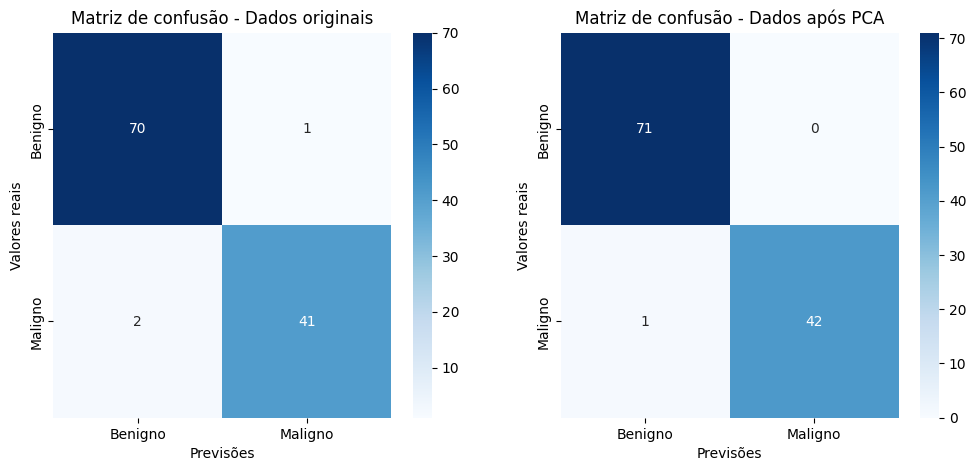

In [244]:
# Calculando as matrizes de confusão para os modelos original e PCA
cm_original = confusion_matrix(y_test, y_pred)
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plotando as matrizes de confusão
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Imprimindo o relatório de classificação para o modelo original
sns.heatmap(cm_original, annot=True, cmap='Blues', fmt='g', ax=ax1)
ax1.set_title("Matriz de confusão - Dados originais")
ax1.set_xlabel("Previsões")
ax1.set_ylabel("Valores reais")
ax1.xaxis.set_ticklabels(["Benigno", "Maligno"])
ax1.yaxis.set_ticklabels(["Benigno", "Maligno"])

print("Matriz de confusão - Dados originais:")
print(cm_original)

print("\nRelatório de classificação - Dados originais:")
print(classification_report(y_test, y_pred))

# Imprimindo o relatório de classificação para o modelo PCA

sns.heatmap(cm_pca, annot=True, cmap='Blues', fmt='g', ax=ax2)
ax2.set_title("Matriz de confusão - Dados após PCA")
ax2.set_xlabel("Previsões")
ax2.set_ylabel("Valores reais")
ax2.xaxis.set_ticklabels(["Benigno", "Maligno"])
ax2.yaxis.set_ticklabels(["Benigno", "Maligno"])

print("\nMatriz de confusão - Dados após PCA:")
print(cm_pca)

print("\nRelatório de classificação - Dados após PCA:")
print(classification_report(y_test, y_pred_pca))



plt.show()


**Matriz de confusão - Dados originais:**
 
* Verdadeiros negativos (TN): 70 casos benignos foram classificados corretamente como benignos;
* Falsos positivos (FP): 1 caso benigno foi classificado incorretamente como maligno;
* Falsos negativos (FN): 2 casos malignos foram classificados incorretamente como benignos;
* Verdadeiros positivos (TP): 41 casos malignos foram classificados corretamente como malignos.

**Matriz de confusão - Dados após PCA:**
* Verdadeiros negativos (TN): 71 casos benignos foram classificados corretamente como benignos;
* Falsos positivos (FP): 0 casos benignos foram classificados incorretamente como malignos;
* Falsos negativos (FN): 1 caso maligno foi classificado incorretamente como benigno;
* Verdadeiros positivos (TP): 42 casos malignos foram classificados corretamente como malignos.

Comparando as duas matrizes de confusão, o modelo treinado com os dados após a aplicação do PCA teve um desempenho ligeiramente melhor, com menos erros de classificação (0 FP e 1 FN) do que o modelo treinado com os dados originais (1 FP e 2 FN).


* **Acurácia:** A acurácia do modelo após PCA (0.99) é ligeiramente maior que a do modelo com os dados originais (0.97). Isso indica que o modelo após PCA classificou corretamente uma proporção maior de exemplos no conjunto de teste.

* **Precisão:** A precisão para ambas as classes (0 e 1) é maior no modelo após PCA em comparação com o modelo original. Isso sugere que o modelo após PCA teve menos falsos positivos em ambas as classes.

* **Recall:** O recall da classe 1 após a aplicação do PCA é maior (0.98) do que o do modelo original (0.95). Isso indica que o modelo após PCA teve um desempenho melhor na identificação de casos malignos em comparação com o modelo original. Além disso, o recall da classe 0 também melhorou no modelo após PCA. Portanto, o modelo após PCA teve um desempenho melhor tanto na identificação de casos benignos quanto malignos.

* **F1-score:** O F1-score é uma métrica que combina precisão e recall, equilibrando os dois aspectos. Neste caso, os F1-scores de ambas as classes no modelo após PCA são ligeiramente maiores do que os do modelo original, o que indica que o modelo após PCA teve um melhor equilíbrio entre precisão e recall.

Em geral, pode-se concluir que a aplicação do PCA melhorou ligeiramente o desempenho do modelo de classificação do câncer de mama.

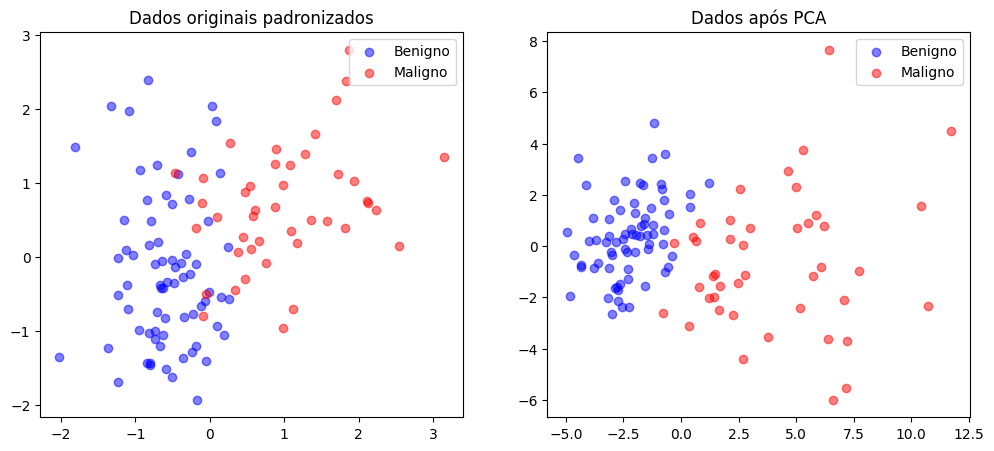

In [245]:
# Criando gráficos de dispersão para visualizar a diferença na estrutura dos dados. 

y_test = y_test.reset_index(drop=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Dados originais
ax1.scatter(X_test_scaled[y_test == 0, 0], X_test_scaled[y_test == 0, 1], color='blue', label="Benigno", alpha=0.5)
ax1.scatter(X_test_scaled[y_test == 1, 0], X_test_scaled[y_test == 1, 1], color='red', label="Maligno", alpha=0.5)
ax1.set_title("Dados originais padronizados")
ax1.legend()

# Dados após PCA
ax2.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color='blue', label="Benigno", alpha=0.5)
ax2.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color='red', label="Maligno", alpha=0.5)
ax2.set_title("Dados após PCA")
ax2.legend()

plt.show()

* Os dois primeiros atributos numéricos do conjunto de dados são "radius_mean" (Atributo 1) e "texture_mean" (Atributo 2).

* (PC1 e PC2) são combinações lineares de todos os 30 atributos originais.

Esses gráficos mostram que as classes benigna e maligna ficaram bem separadas, o que indica que o método de PCA foi eficaz na extração de informações relevantes dos dados originais e na redução da complexidade do modelo sem perda significativa de informações.

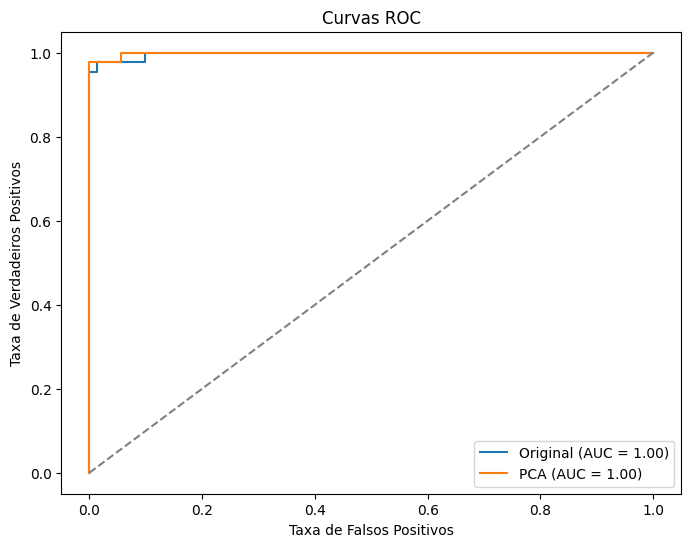

AUC-ROC - Dados originais: 0.99737962659679
AUC-ROC - Dados após PCA: 0.998689813298395


In [246]:
# Calculando as probabilidades preditas para cada classe
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred_pca_proba = model_pca.predict_proba(X_test_pca)[:, 1]

# Calculando a taxa de verdadeiros positivos e a taxa de falsos positivos
fpr_original, tpr_original, _ = roc_curve(y_test, y_pred_proba)
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_pred_pca_proba)

# Calculando a área sob a curva (AUC)
auc_original = auc(fpr_original, tpr_original)
auc_pca = auc(fpr_pca, tpr_pca)

# Plotando as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, label=f"Original (AUC = {auc_original:.2f})")
plt.plot(fpr_pca, tpr_pca, label=f"PCA (AUC = {auc_pca:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curvas ROC")
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC - Dados originais:", auc_original)
print("AUC-ROC - Dados após PCA:", auc_pca)


* fpr_original: taxa de falsos positivos do modelo original.
* tpr_original: taxa de verdadeiros positivos do modelo original.
* auc_original: área sob a curva ROC do modelo original.
* fpr_pca: taxa de falsos positivos do modelo após PCA.
* tpr_pca: taxa de verdadeiros positivos do modelo após PCA.
* auc_pca: área sob a curva ROC do modelo após PCA.

No caso dos dados originais, a curva ROC é de 0.99737962659679, o que indica que o modelo tem um desempenho muito bom em separar as classes positivas e negativas. Ou seja, o modelo tem uma alta taxa de verdadeiros positivos e uma baixa taxa de falsos positivos.

Já nos dados após PCA, a curva ROC é de 0.998689813298395, um valor um pouco maior que o modelo original. Isso sugere que o modelo após a redução de dimensionalidade apresenta um desempenho ainda melhor na classificação binária.

**Portanto, podemos concluir que a aplicação do método de PCA é uma estratégia eficaz para reduzir a dimensionalidade de conjuntos de dados com muitas variáveis, melhorar o desempenho dos modelos de classificação e facilitar a interpretação dos dados.**